# **PROJECT 1 - Introduction to Machine Learning and Artificial Intelligence**

Here is the interactive code for the first project. This project deals with the implementation of machine learning algorithms to model concrete compressive strength. The dataset used in this project is from the University of California Irvine Machine Learning Repository and is also available through their server.

# **Concrete Compressive Strength**
Here is the interactive code for the first project. This project deals with the implementation of machine learning algorithms to model concrete compressive strength. The dataset used in this project is from the University of California Irvine Machine Learning Repository and is also available through their server.

In this project, we will study a regression application using two algorithms: a multivariate linear regression algorithm (as a baseline) and a neural network algorithm in the civil engineering field.

Artificial intelligence, particularly machine learning algorithms, is very important in modelling complex systems. Concrete is one of the most important components in construction. Therefore, the concrete compressive strength analysis, which is a highly nonlinear function, becomes crucial.

In this project, the concrete compressive strength is investigated. To do so, a dataset is employed containing the ingredients and age of the concrete as input features and their corresponding compressive strength as the output. The machine learning models are then trained using this dataset.

***There are some optional hints available for each question at the end of this page.***

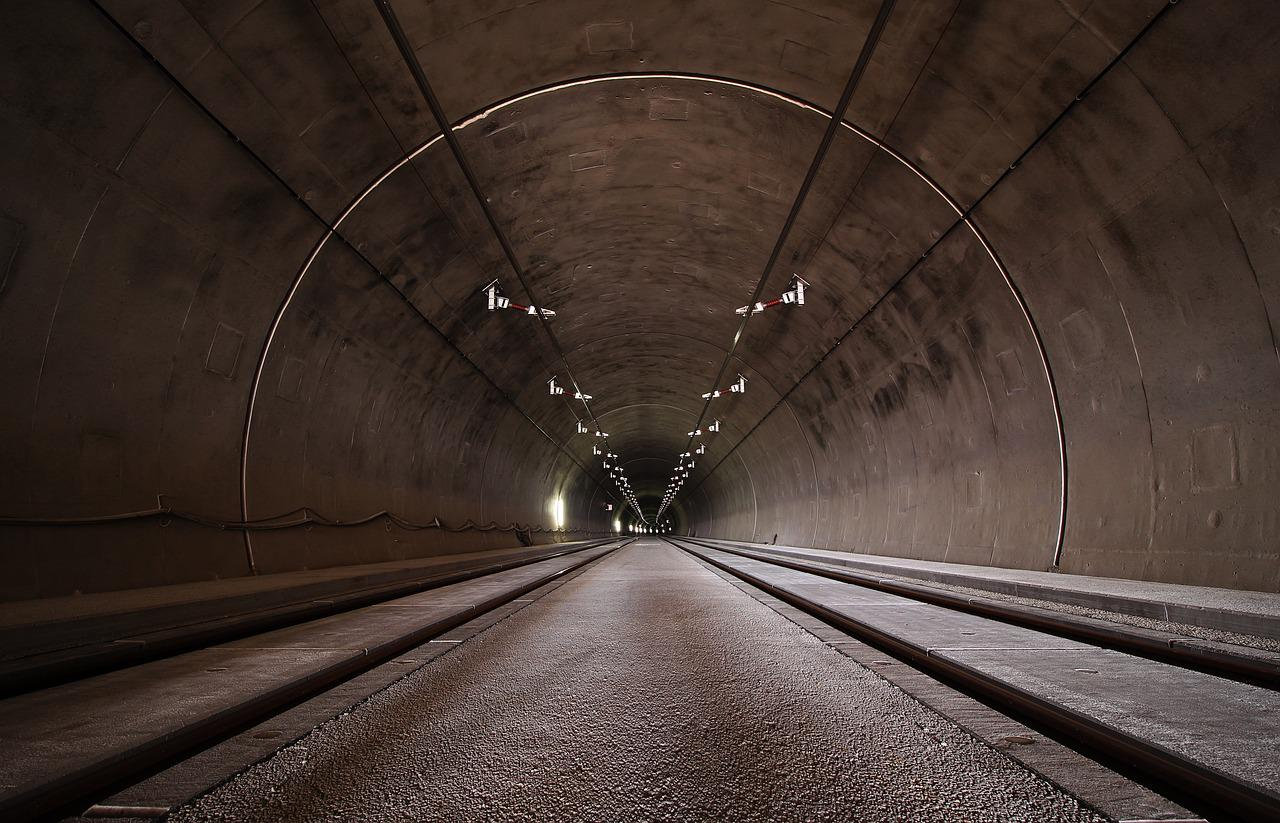

# **Neural Network Regression**
In this project, implementing a neural network for a civil engineering application is studied.

## Import the TensorFlow
First let's call the TensorFlow,

In [1]:
# Run on TensorFlow 2.x
# %tensorflow_version 2.x

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

## Import relevant modules
Then, we need to import some necessary modules for data preparation, computation, plotting, etc.

In [3]:
#Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset
Here we need to load the dataset.

In [4]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [5]:
# Import the dataset.
dataset = pd.read_csv(filepath_or_buffer="Concrete_dataset.csv")

We can now have a glimpse into the dataset,

In [6]:
dataset.head()

,Cement (kg_in_m3),Blast Furnace Slag (kg_in_m3),Fly Ash (kg_in_m3),Water (kg_in_m3),Superplasticizer (kg_in_m3),Coarse Aggregate (kg_in_m3),Fine Aggregate (kg_in_m3),Age (day),Concrete compressive strength (Mpa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,80.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.9
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.3
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.3


The statistics of the dataset such as the number of examples, mean value for each feature, etc. can be obtained as well,

In [7]:
dataset.describe()

,Cement (kg_in_m3),Blast Furnace Slag (kg_in_m3),Fly Ash (kg_in_m3),Water (kg_in_m3),Superplasticizer (kg_in_m3),Coarse Aggregate (kg_in_m3),Fine Aggregate (kg_in_m3),Age (day),Concrete compressive strength (Mpa)
count,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0
mean,281.2,73.9,54.2,181.6,6.2,972.9,773.6,45.7,35.8
std,104.5,86.3,64.0,21.4,6.0,77.8,80.2,63.2,16.7
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.3
25%,192.4,0.0,0.0,164.9,0.0,932.0,730.9,7.0,23.7
50%,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.4
75%,350.0,142.9,118.3,192.0,10.2,1029.4,824.0,56.0,46.1
max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6


The correlation between different features and the target (label) is often a good way to establish some understanding about the dataset.

**Question 1:**
Show the correlation among the attributes in the dataset. Then, find two features with the highest correlation to the target, "Concrete compressive strength (Mpa)".

In [8]:
# Generate a correlation matrix.
# Write your code between the lines (~ 1 line)
#################################################
print("Cement (kg_in_m3) and Superplasticizer (kg_in_m3) have the highest correlation with target Concrete compressive strength (Mpa)")
dataset.corr()
#################################################

Cement (kg_in_m3) and Superplasticizer (kg_in_m3) have the highest correlation with target Concrete compressive strength (Mpa)


,Cement (kg_in_m3),Blast Furnace Slag (kg_in_m3),Fly Ash (kg_in_m3),Water (kg_in_m3),Superplasticizer (kg_in_m3),Coarse Aggregate (kg_in_m3),Fine Aggregate (kg_in_m3),Age (day),Concrete compressive strength (Mpa)
Cement (kg_in_m3),1.0,-0.3,-0.4,-0.1,0.1,-0.1,-0.2,0.1,0.5
Blast Furnace Slag (kg_in_m3),-0.3,1.0,-0.3,0.1,0.0,-0.3,-0.3,-0.0,0.1
Fly Ash (kg_in_m3),-0.4,-0.3,1.0,-0.3,0.4,-0.0,0.1,-0.2,-0.1
Water (kg_in_m3),-0.1,0.1,-0.3,1.0,-0.7,-0.2,-0.5,0.3,-0.3
Superplasticizer (kg_in_m3),0.1,0.0,0.4,-0.7,1.0,-0.3,0.2,-0.2,0.4
Coarse Aggregate (kg_in_m3),-0.1,-0.3,-0.0,-0.2,-0.3,1.0,-0.2,-0.0,-0.2
Fine Aggregate (kg_in_m3),-0.2,-0.3,0.1,-0.5,0.2,-0.2,1.0,-0.2,-0.2
Age (day),0.1,-0.0,-0.2,0.3,-0.2,-0.0,-0.2,1.0,0.3
Concrete compressive strength (Mpa),0.5,0.1,-0.1,-0.3,0.4,-0.2,-0.2,0.3,1.0


## Separate input features and targets
Here we separate the input features from the target. This would help us to work separately on the input features later during normalization.



**Question 2:**
Separate the dataset into the output target which is "Concrete compressive strength (Mpa)" (`y_dataset`) and the rest as the input features (`X_dataset`).

In [9]:
# Split the dataset into input features and the output target.
# Write your code between the lines (~ 2 lines)
#################################################
y_dataset = dataset.loc[:, dataset.columns.isin(['Concrete compressive strength (Mpa)'])]
X_dataset = dataset.loc[:, ~dataset.columns.isin(['Concrete compressive strength (Mpa)'])]
#################################################
print("Dataset separated.")

Dataset separated.


## Normalize values
The values of different features should be roughly in similar ranges. Therefore, normalizing the input features might be a useful step before building the models. Here we calculate the Z-score for each input feature column.

**Question 3:** Find the normalized input features.

In [10]:
# Convert raw values to their Z-scores
# Calculate the Z-scores of each input feature column.
# Write your code between the lines (~ 3 lines)
#################################################
X_dataset_mean = X_dataset.mean()
X_dataset_std = X_dataset.std()
X_dataset_norm = (X_dataset-X_dataset_mean)/X_dataset_std
#################################################
print("Dataset normalized.")

Dataset normalized.


## Split the dataset
At this stage, we should split the dataset into the training set and the validation/test set. Therefore, we would have normalized input features and their corresponding targets both for the training and validation/test sets.

**Question 4:**
Split the dataset into the training set (80%) and validation/test set (20%). Make sure that the random state is set to 100 or `random_state=100` for reproducibility.

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (80%) and the test set (20%).
# Write your code between the lines (~ 1 line)
#################################################
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_dataset_norm, y_dataset, 
                                                              test_size=0.2, random_state=100)
#################################################
print("Dataset split.")

Dataset split.


## Define a multivariate linear regression model as a baseline
A multivariate linear regression model can be used as a baseline to later compare the results with the neural network. Here we define the function to create and train a multivariate linear regression model.

**Question 5:** Train the initialized model using the training data.

In [12]:
# Create a linear regression object
model_LR = LinearRegression(n_jobs=-1)

# Train the model using the training data
# Write your code between the lines (~ 1 line)
#################################################
model_LR =model_LR.fit(X_train_norm,y_train) 
#################################################

# Print model's parameters
print(model_LR.intercept_)
print(model_LR.coef_)

[35.91751655]
[[12.9748385   8.94444004  5.97546413 -2.86774364  1.72072076  1.60620725
   2.05493992  7.24036633]]


**Question 6:**
After training, evaluate the performance of the linear regression model against the test set. To do so, run the following cell and report the `mean_squared_error`.

In [13]:
# Predict the output for the test data
y_pred_LR = model_LR.predict(X_test_norm)

# Evaluate the performance using the mean squared error
print(mean_squared_error(y_test, y_pred_LR))

113.17875937789913


## Define a neural network model
In here, we define a neural network model by specifying the number of layers, nodes, and activation functions.

**Question 7:**
Complete the code and define a neural network with two more hidden layers with 16 and 8 nodes. Set the `activation` function for the hidden layers as relu and the `kernel_regularizer` as `l2` with `l=0.001`.

In [14]:
# find the number of input features
n_features = X_train_norm.shape[1]


# Create the neural network
model_NN = tf.keras.Sequential([
    layers.Dense(32, 
                 activation='relu', 
                 kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
                 input_shape=(n_features,)),
    # Write your code between the lines (~ 2 lines)
    #################################################
    layers.Dense(16, 
                 activation='relu', 
                 kernel_regularizer=tf.keras.regularizers.l2(l=0.001)),
    layers.Dense(8, 
                 activation='relu', 
                 kernel_regularizer=tf.keras.regularizers.l2(l=0.001)),
    #################################################
    layers.Dense(1)
])

## Train the neural network model
Finally, the neural network model should be compiled and trained using the training data. Here we set the optimization algorithm, loss function, the number of epochs, and the batch size for training the model.

**Question 8:** Train the neural network model. Set `epochs` to 200 and `batch_size` to 30.

In [15]:
# compile the model
model_NN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# fit the model
# Write your code between the lines (~ 1 line)
#################################################
model_NN.fit(X_train_norm, y_train,
             batch_size=30, epochs=200,
             verbose=0,use_multiprocessing=True)
#################################################

**Question 9:**
Evaluate the performance of the neural network model against the test set. To do so, run the following cell and report the `mean_squared_error`.

In [16]:
# Evaluate the performance using the mean squared error
model_NN.evaluate(X_test_norm, y_test)

206/206 [==============================] - 0s 626us/sample - loss: 41.2969 - mean_squared_error: 41.1787


[41.29685988935452, 41.178665]

**Question 10:**
Which model did perform better against the test set in predicting the output. Moreover, is there any overfitting observed for either the multivariate linear regression model or the neural network model? Motivate your answer.

**Answer**
Since the neural network model has a lower mean_squared_error of 41.17 when compared to multivariate linear regression model which has a mean_squared_error of 113.17 over the test dataset, neural network model outperforms the latter.

The neural network model may suffer from overfitting owing to high difference between mean_squared_error (41.17) during training and mean_squared_error (25.99) during testing. 
However, multivariate linear regression model is found to have similar mean_squared_error across both training (105.96) and testing (113.17) and hence may not suffer from overfitting.

In [17]:
a=model_NN.evaluate(X_train_norm, y_train)[1]

824/824 [==============================] - 0s 170us/sample - loss: 26.1122 - mean_squared_error: 25.9940


In [18]:
print("The mean squared error for NN model during training:", a)
print("The mean squared error for multivariate linear regression model during training:", mean_squared_error(y_train, model_LR.predict(X_train_norm)))

The mean squared error for NN model during training: 25.993961
The mean squared error for multivariate linear regression model during training: 105.9667651067472


## Optional hints
If you need assistance, you may click on the cell below to see the hints for each question.

In [19]:
#@title Hints

# Question 1: Use the pandas command "DataFrame.corr()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Question 2: To separate the last column (target) of the dataset, you can use
# the pandas command "DataFrame.pop(item)".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html

# Question 3: The formula for z.score normalization is
# "z-score = (dataset - dataset_mean)/dataset_standard_deviation".
# To find the mean value use the pandas command "DataFrame.mean()" and
# to find the standard deviation use the pandas command "DataFrame.std()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

# Question 4: To split the dataset into the training set and the test set, you
# can use the sklearn command "sklearn.model_selection.train_test_split(...)".
# Make sure that the random state is set as "random_state=100".
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Question 5: You can train the model using "fit" function.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit.

# Question 6: Self-explanatory!

# Question 7: You need to add two more hidden layers to your neural network model.
# It would be very similar to the provided first hidden layer. Only remember to
# set the number of units to 16 for the second hidden layer and 8 for the third
# hidden layer. Also set the activation functions to "relu" and implement the
# regularization term exactly as the first hidden layer.
# For more information:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# Question 8: Use the fit function to train the model.
# For more information:
# https://keras.io/api/models/model_training_apis/

# Question 9: Self-explanatory!

# Question 10: The comparison between performance of the two models (i.e. the linear
# regression and the neural network) is simply done based on the evaluations on
# the test set. Furthermore, to check the overfitting, compare the mean squared
# error on the training set vs the mean squared error against the test set for
# each model separately.

# Best of luck!
